# Proyecto de Detección de Anomalías - Unidad Generadora ADT02

Este proyecto se enfoca en el análisis de datos operativos de un generador perteneciente a una central hidroeléctrica. El objetivo es explorar y comprender el comportamiento de variables clave como la potencia activa, caudal turbinado, apertura del distribuidor, y temperaturas del cojinete axial (metal, aceite y agua). Se busca establecer relaciones entre estas variables que puedan explicar fenómenos de interés como el rendimiento del generador o posibles condiciones de alerta que afecten el sistema de refrigeración del cojinete.

**Contexto:**
Este proyecto busca detectar fallas incipientes en componentes mecánicos de la unidad generadora ADT02 utilizando datos históricos de sensores de vibración, temperatura, flujo y estado operativo.

**Objetivo:**
Implementar un modelo no supervisado de detección de anomalías sobre datos de operación para identificar patrones atípicos que puedan indicar fallas.

# Preguntas e hipótesis

**Preguntas de interés**

- ¿Existe relación entre la potencia generada y el caudal turbinado?
- ¿Como se comportan las vibraciones en relación con la temperatura del cojinete?
- ¿Qué efecto tiene la apertura del distribuidor sobre la potencia y la temperatura del cojinete?
- ¿Las temperaturas del cojinete (metal y aceite) están correlacionadas?
- ¿Hay diferencias significativas de temperatura entre los distintos sensores del cojinete (x1 a x12)?
- ¿La eficiencia del sistema de enfriamiento (entrada vs salida de agua) varía en función del esfuerzo operativo?

**Hipótesis**

- H1: A mayor apertura del distribuidor, mayor potencia generada y mayor temperatura en los cojinetes.
- H2: Las temperaturas del metal y del aceite del cojinete axial se comportan de forma sincronizada (alta correlación).
- H3: Si el sistema de enfriamiento es eficiente, la diferencia entre la temperatura de entrada y salida del agua debe mantenerse constante.
- H4: A mayor incremento de vibraciones, mayor temperatura de cojinetes.

In [ ]:
!pip install missingno

In [34]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import math

In [83]:
df = pd.read_csv("dataset_gen2.csv", parse_dates=["Timestamp"])
print("Datos cargados y preprocesados")

Datos cargados y preprocesados


#Se inspecciona el DF para revisar, nombres de columnas, cantidad de filas y columnas e información general.

In [84]:
df.shape

(8113, 32)

In [85]:
display(df.columns)

Index(['Timestamp', 'Potencia activa ADT02', 'Caudal Turbinado',
       'Nivel de cota de embalse',
       'Temperatura aceite caliente cojinete axial',
       'Temperatura aceite frio cojinete axial',
       'Temperatura entrada agua enfriam. aceite',
       'Temperatura salida agua  enfriam. aceite',
       'Temperatura bobinado fase U', 'Temperatura bobinado fase V',
       'Temperatura bobinado fase W', 'Apertura Distribuidor',
       'Temperatura metal cojinete Axial x1',
       'Temperatura metal cojinete Axial x2',
       'Temperatura metal cojinete Axial x3',
       'Temperatura metal cojinete Axial x4',
       'Temperatura metal cojinete Axial x5',
       'Temperatura metal cojinete Axial x6',
       'Temperatura metal cojinete Axial x7',
       'Temperatura metal cojinete Axial x8',
       'Temperatura metal cojinete Axial x9',
       'Temperatura metal cojinete Axial x10',
       'Temperatura metal cojinete Axial x11',
       'Temperatura metal cojinete Axial x12', 'Vibracio

In [86]:
#Se obtiene información de cada columna
df.info()

#Se observa que salvo Timestamp todos los valores son de tipo float, por lo que no es necesario
#convertir ningún valor para poder trabajar.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8113 entries, 0 to 8112
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype              
---  ------                                      --------------  -----              
 0   Timestamp                                   8113 non-null   datetime64[ns, UTC]
 1   Potencia activa ADT02                       8110 non-null   float64            
 2   Caudal Turbinado                            8110 non-null   float64            
 3   Nivel de cota de embalse                    8110 non-null   float64            
 4   Temperatura aceite caliente cojinete axial  8110 non-null   float64            
 5   Temperatura aceite frio cojinete axial      8110 non-null   float64            
 6   Temperatura entrada agua enfriam. aceite    8110 non-null   float64            
 7   Temperatura salida agua  enfriam. aceite    8110 non-null   float64            
 8   Temperatura bobinado fase U           

In [87]:
display(df.head())

,Timestamp,Potencia activa ADT02,Caudal Turbinado,Nivel de cota de embalse,Temperatura aceite caliente cojinete axial,Temperatura aceite frio cojinete axial,Temperatura entrada agua enfriam. aceite,Temperatura salida agua enfriam. aceite,Temperatura bobinado fase U,Temperatura bobinado fase V,...,Temperatura metal cojinete Axial x11,Temperatura metal cojinete Axial x12,Vibracion absoluta superior X,Vibracion absoluta turbina X,Vibracion relativa inferior X,Vibracion relativa inferior Y,Vibracion relativa superior X,Vibracion relativa superior Y,Vibracion relativa turbina X,Vibracion relativa turbina Y
0,2024-07-01 03:00:00+00:00,-0.100243,0.0,1337.12,12.795834,11.711283,13.237692,21.15381,34.53576,34.414635,...,30.740421,30.700046,0.145982,0.155278,0.129989,0.184281,0.126116,0.128255,0.102553,0.061889
1,2024-07-01 03:30:00+00:00,-0.100243,0.0,1337.12,12.795834,11.711283,13.237692,21.15381,34.53576,34.414635,...,30.740421,30.700046,0.144642,0.153899,0.129104,0.155675,0.098157,0.127375,0.101658,0.061552
2,2024-07-01 04:00:00+00:00,-0.100243,0.0,1337.12,12.795834,11.711283,13.237692,21.15381,34.53576,34.414635,...,30.740421,30.700046,0.143302,0.152520,0.128219,0.137150,0.098100,0.126496,0.100762,0.061214
3,2024-07-01 04:30:00+00:00,-0.100243,0.0,1337.12,12.795834,11.711283,13.237692,21.15381,34.53576,34.414635,...,30.740421,30.700046,0.141961,0.151141,0.127333,0.118625,0.097557,0.125616,0.099867,0.060876
4,2024-07-01 05:00:00+00:00,-0.100243,0.0,1337.12,12.795834,11.711283,13.237692,21.15381,34.53576,34.414635,...,30.740421,30.700046,0.140621,0.149762,0.126448,0.116289,0.097014,0.124737,0.098971,0.060538


In [88]:
df.describe()

,Potencia activa ADT02,Caudal Turbinado,Nivel de cota de embalse,Temperatura aceite caliente cojinete axial,Temperatura aceite frio cojinete axial,Temperatura entrada agua enfriam. aceite,Temperatura salida agua enfriam. aceite,Temperatura bobinado fase U,Temperatura bobinado fase V,Temperatura bobinado fase W,...,Temperatura metal cojinete Axial x11,Temperatura metal cojinete Axial x12,Vibracion absoluta superior X,Vibracion absoluta turbina X,Vibracion relativa inferior X,Vibracion relativa inferior Y,Vibracion relativa superior X,Vibracion relativa superior Y,Vibracion relativa turbina X,Vibracion relativa turbina Y
count,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,...,8110.000000,8110.000000,8103.000000,8103.000000,8103.000000,8103.000000,8103.000000,8103.000000,8103.000000,8103.000000
mean,17.482574,16.136416,1335.138580,23.367033,16.602385,12.981320,17.145497,43.432277,43.416667,45.996784,...,41.247634,41.012450,0.368456,0.229002,59.284013,57.264354,60.615453,52.374113,75.194964,76.756878
std,28.253986,25.924869,1.852592,12.957150,5.740888,3.441044,5.657531,17.299594,17.711594,18.388320,...,19.077010,18.817501,0.348804,0.146213,97.668922,93.946889,99.143223,85.675677,123.757503,126.500812
min,-0.165472,-0.111792,1300.000000,9.383119,8.501669,6.418277,5.697103,10.827587,10.385730,12.273642,...,12.755667,12.675332,0.076125,0.088753,0.069326,0.071251,0.059362,0.068614,0.060945,0.044271
25%,-0.126335,0.000000,1333.950000,13.639362,11.831784,11.028422,12.434310,31.759901,31.426811,33.415321,...,28.412806,28.362467,0.137868,0.135662,0.097630,0.132305,0.092252,0.102621,0.081737,0.066193
50%,-0.100243,0.000000,1334.695000,16.531492,13.800051,12.755667,17.214352,43.508278,43.083228,45.248928,...,35.908540,35.827790,0.167947,0.154603,0.115182,0.225728,0.115898,0.129061,0.101847,0.085422
75%,57.873817,52.060326,1336.630000,39.976406,21.677350,15.005083,21.153810,58.693024,59.303394,62.680775,...,65.895390,65.285020,0.848775,0.318271,197.263978,189.291466,213.781563,186.273895,227.396250,229.689082
max,71.936840,69.357490,1338.150000,47.272950,29.208170,21.516266,31.749807,74.054770,75.241000,79.331436,...,73.359410,72.541310,1.227582,0.945725,500.528076,269.295500,319.292877,252.780200,317.875763,326.458923


DATA WRANGLING

In [89]:
#Valores duplicados
df.duplicated().sum()

0

Se observa que no hay valores duplicados, por lo tanto no se toma ninguna acción en relación a esto.

149


<AxesSubplot:>

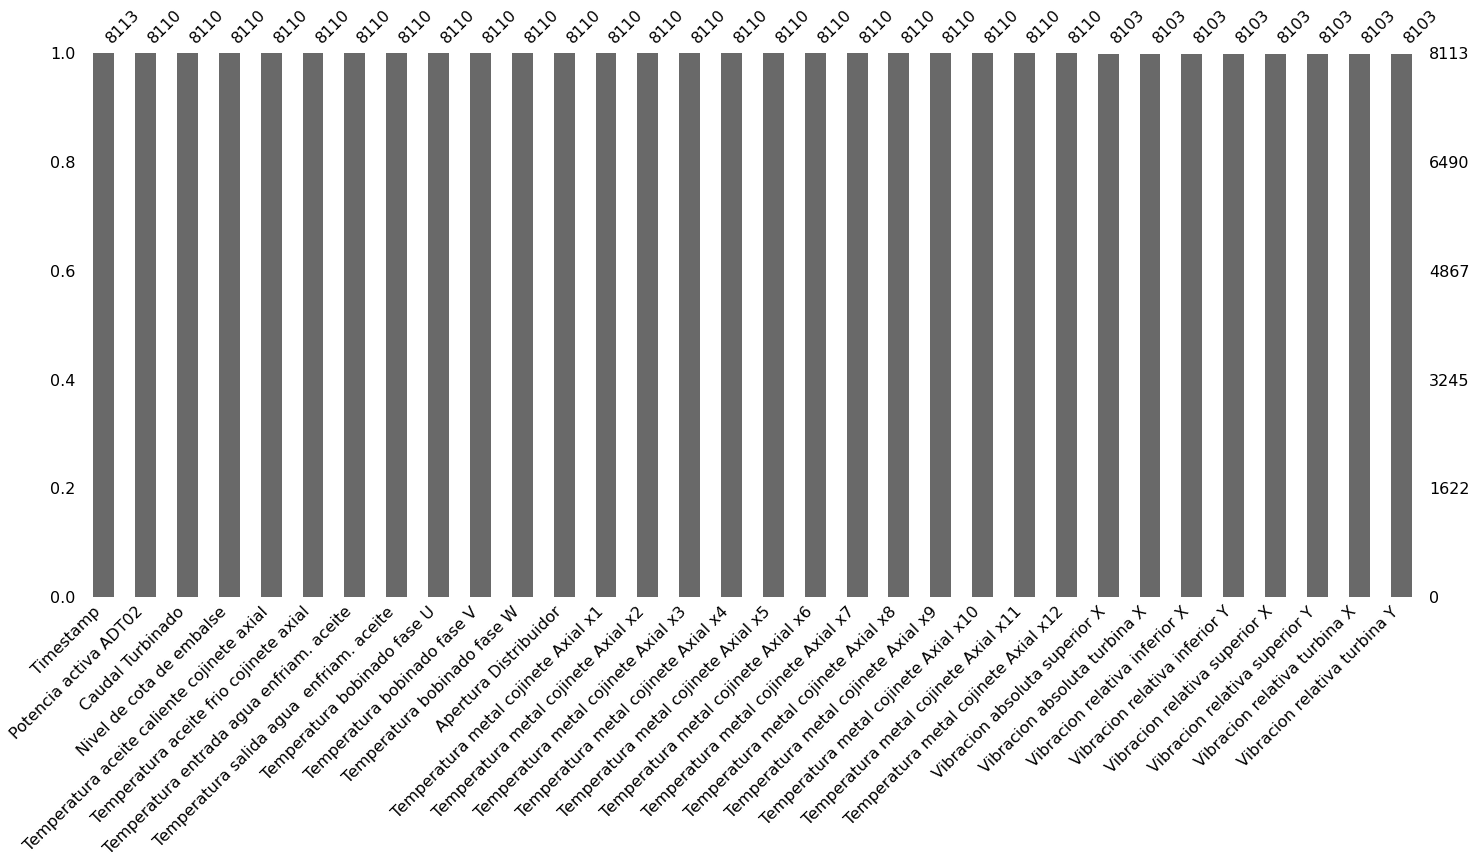

In [90]:
#Valores nulos
nulos = df.isnull().sum().sum()
print(nulos)
msno.bar(df)

#Debido a la baja cantidad de valores nulos se decide elimininarlos porque no altera el conjunto de datos.

In [91]:
#Se eliminan los nulos
df.dropna(inplace=True)
#Se observa el resultado
df.shape

(8100, 32)

Se observa un total de 8100 filas de 8113 que tenía originalmente.

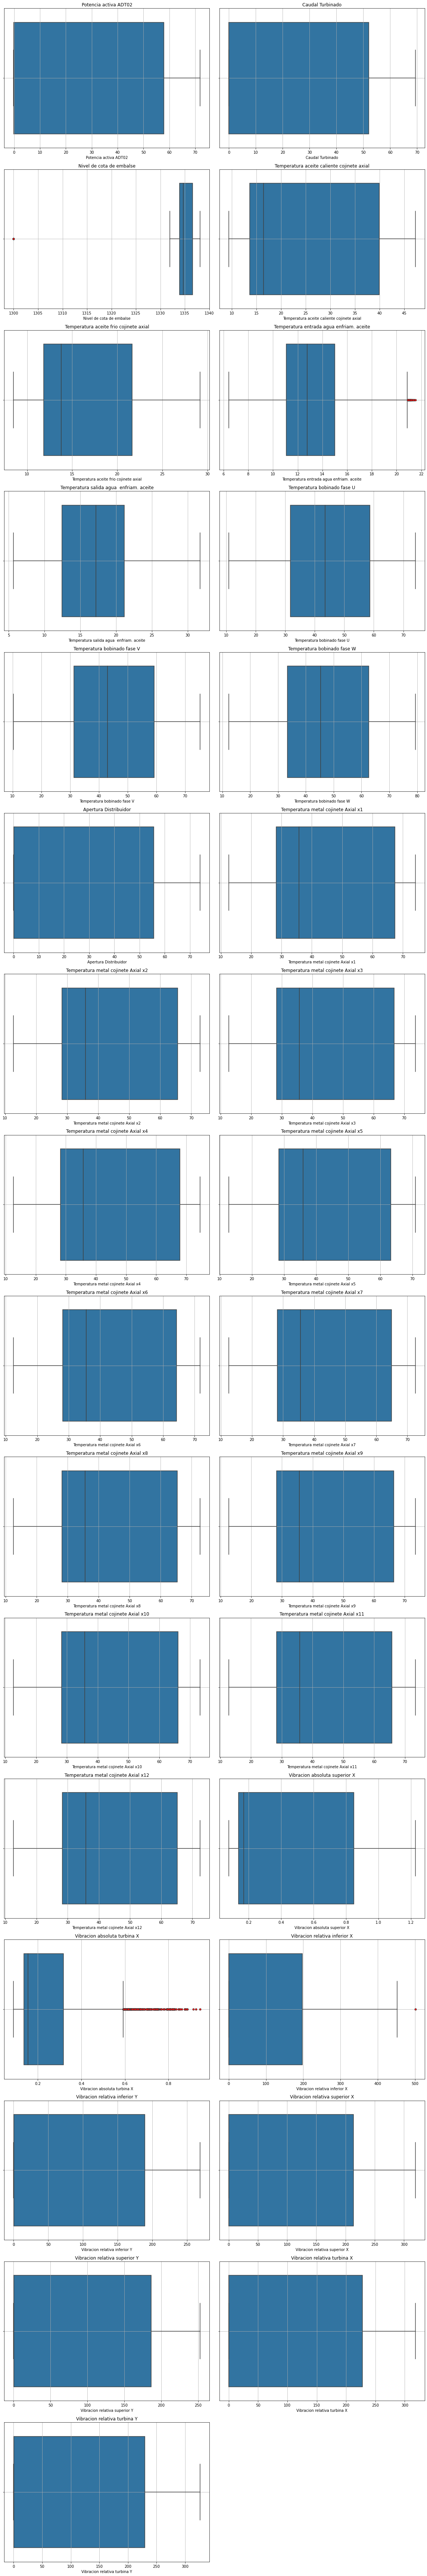

In [92]:
#Revisión de outliers
def ver_boxplots(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    n_cols = 2
    n_rows = math.ceil(len(numeric_cols) / n_cols)

    plt.figure(figsize=(16, 6 * n_rows))

    flier_props = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')

    for i, column in enumerate(numeric_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.boxplot(x=df[column], orient="y",flierprops=flier_props)
        plt.title(f'{column}')
        plt.grid(True)
        plt.tight_layout()

    plt.show()

ver_boxplots(df)

Se identifica que hay un error en la medición de nivel de cota de embalse por ser una variable que no puede presentar ese tipo de escalones. Se procede a graficar una distribución de ésta.

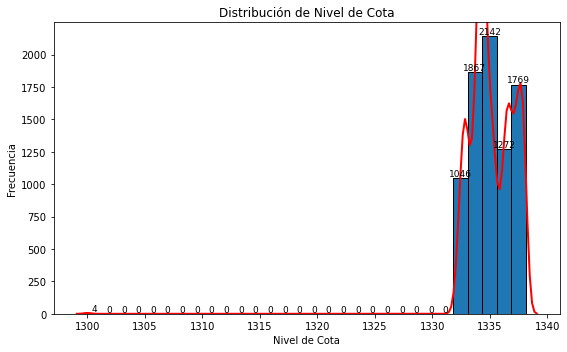

In [95]:
# Datos
x = df['Nivel de cota de embalse']
# Crear figura y eje
fig, ax = plt.subplots(figsize=(8, 5))

# Histograma (sin normalizar)
counts, bins, bars = ax.hist(x, bins=30, edgecolor='black')

# Etiquetas
ax.bar_label(bars, fmt='%d', fontsize=9)

# Calcular curva KDE
kde = sns.kdeplot(x, bw_adjust=1, ax=ax, color='red', linewidth=2)

# Escalar la KDE para que coincida con la escala del histograma
kde_y = kde.get_lines()[0].get_data()[1]
kde_x = kde.get_lines()[0].get_data()[0]

# Escalado manual: multiplicar la densidad por el área total del histograma
area = sum(np.diff(bins) * counts)
ax.lines[-1].set_ydata(kde_y * area)

# Títulos y etiquetas
ax.set_title('Distribución de Nivel de Cota')
ax.set_xlabel('Nivel de Cota')
ax.set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()

Entonces se procede a eliminar los registros donde el nivel es 1300. Para el caso de vibraciones y temperatura se decide mantener 
porque puede representar algo importante.

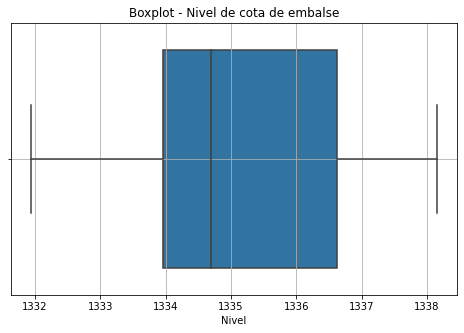

In [96]:
#Se elimina los registros para la cota 1300
df = df[df["Nivel de cota de embalse"] != 1300]

#Se grafica nuevamente el boxplot para esta variable
flier_props = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Nivel de cota de embalse"], orient="y", flierprops=flier_props)
plt.title("Boxplot - Nivel de cota de embalse")
plt.xlabel("Nivel")
plt.grid(True)
plt.show()


Revisando el boxplot y el cuadro de las estadísticas descriptivas generado con df.describe(), se observa que hay una gran cantidad de valores de potencia activa que tienen valor negativo. Se procede a analizarlo.

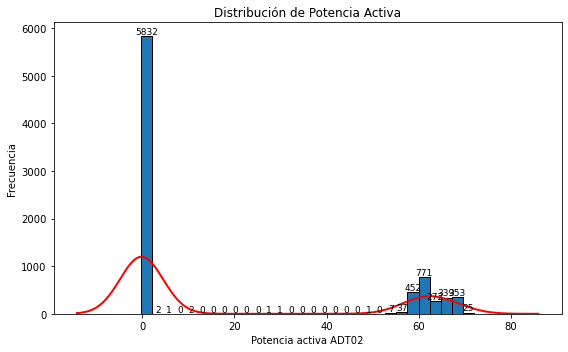

In [98]:
# Datos
x = df['Potencia activa ADT02']
# Crear figura y eje
fig, ax = plt.subplots(figsize=(8, 5))

# Histograma (sin normalizar)
counts, bins, bars = ax.hist(x, bins=30, edgecolor='black')

# Etiquetas
ax.bar_label(bars, fmt='%d', fontsize=9)

# Calcular curva KDE
kde = sns.kdeplot(x, bw_adjust=1, ax=ax, color='red', linewidth=2)

# Escalar la KDE para que coincida con la escala del histograma
kde_y = kde.get_lines()[0].get_data()[1]
kde_x = kde.get_lines()[0].get_data()[0]

# Escalado manual: multiplicar la densidad por el área total del histograma
area = sum(np.diff(bins) * counts)
ax.lines[-1].set_ydata(kde_y * area)

# Títulos y etiquetas
ax.set_title('Distribución de Potencia Activa')
ax.set_xlabel('Potencia activa ADT02')
ax.set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()

Se observa que hay existen valores que corresponden a un error de lectura cuando el generador está detenido. Se procede
a eliminar todos los registros cuando la potencia activa sea menor a 40.

In [102]:
#Se elimina los registros para potencia activa menor a 40
df = df[df["Potencia activa ADT02"] > 40]
df.shape

(2257, 32)

Se observa que se reduce drásticamente la cantidad de registros gracias a esta limpieza.

# EDA (Análisis exploratorio de datos)

Se procede a graficar las distribuciones de todas las variables para revisar su comportamiento.

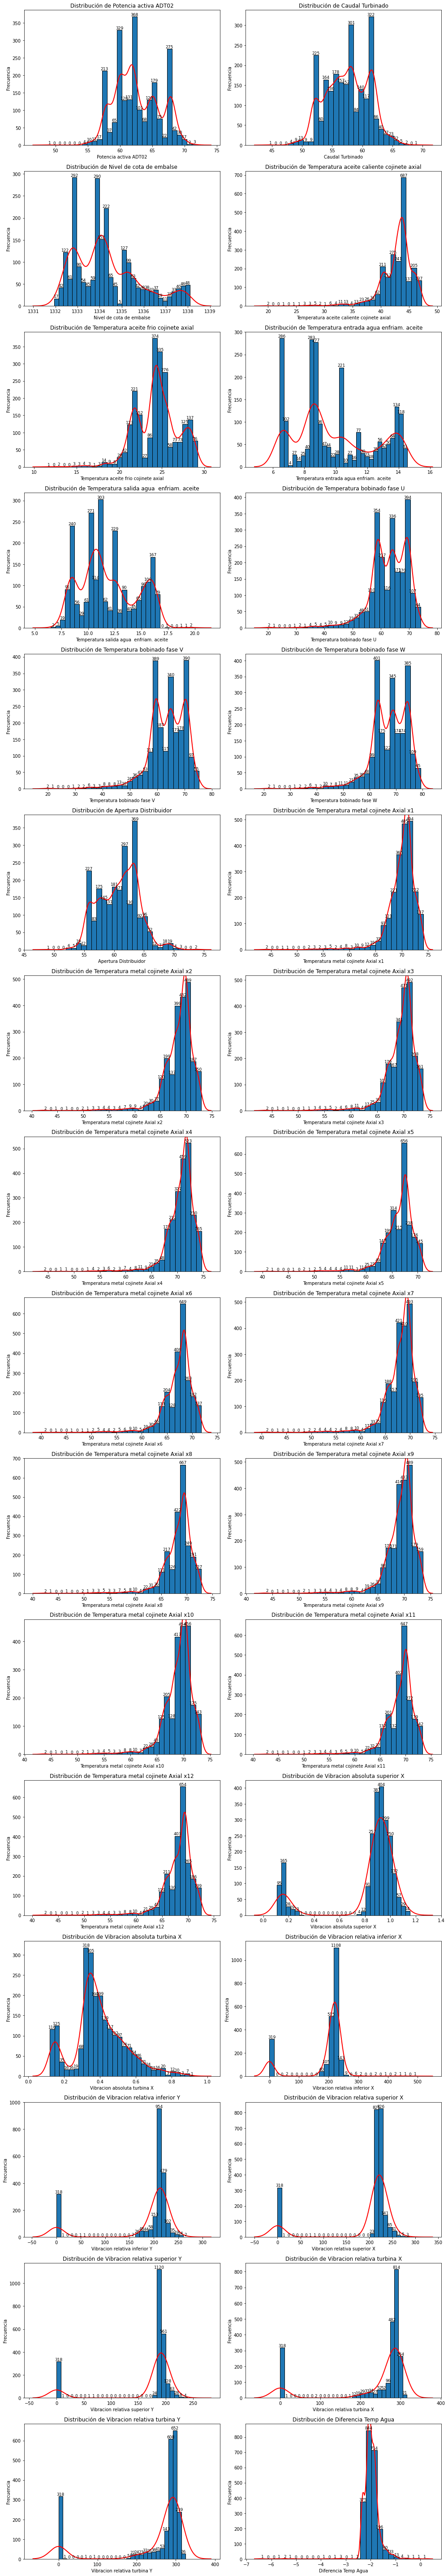

In [130]:
# Seleccionar variables numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Definir número de columnas por fila
cols_per_row = 2
n_cols = cols_per_row
n_rows = int(np.ceil(len(numeric_columns) / cols_per_row))

# Crear figura general
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
axes = axes.flatten()

# Iterar sobre variables
for i, col in enumerate(numeric_columns):
    ax = axes[i]
    x = df[col].dropna()

    # Histograma
    counts, bins, bars = ax.hist(x, bins=30, edgecolor='black')
    ax.bar_label(bars, fmt='%d', fontsize=9)

    # KDE
    kde = sns.kdeplot(x, bw_adjust=1, ax=ax, color='red', linewidth=2)
    kde_y = kde.get_lines()[0].get_data()[1]
    kde_x = kde.get_lines()[0].get_data()[0]
    area = sum(np.diff(bins) * counts)
    ax.lines[-1].set_ydata(kde_y * area)

    # Etiquetas
    ax.set_title(f'Distribución de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

# Eliminar ejes sobrantes si hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Se observa principalmente que todas las Temperaturas metal cojinete Axial xN tienen una dsitribución con sesgo hacia la izquierda y mantienen una forma muy similar entre ellas. 

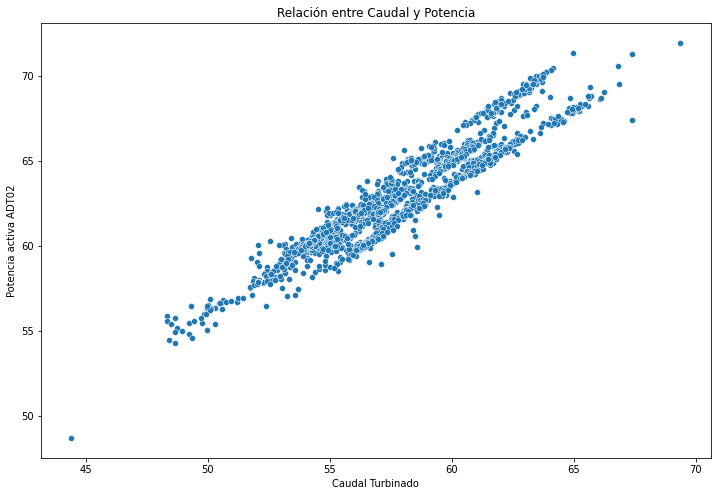

In [132]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Caudal Turbinado', y='Potencia activa ADT02')
plt.title('Relación entre Caudal y Potencia')
plt.show()

#df[['Caudal Turbinado', 'Potencia activa ADT02']].corr()


Se observa que efectivamente hay una relación directa entre la potencia y caudal turbinado.

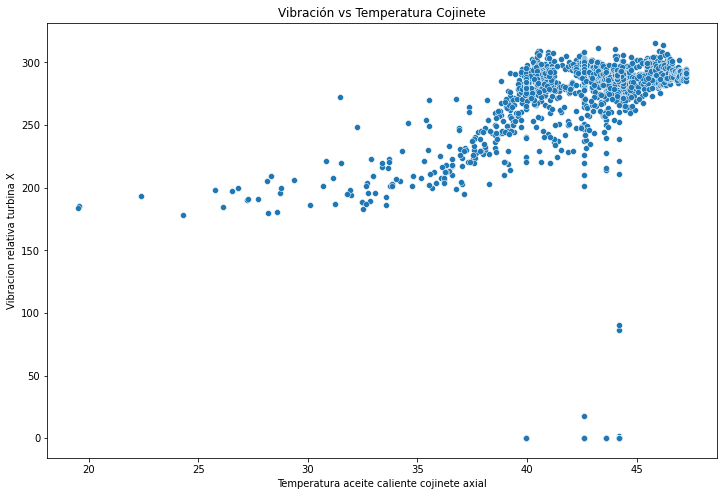

In [137]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Temperatura aceite caliente cojinete axial', y='Vibracion relativa turbina X')
plt.title('Vibración vs Temperatura Cojinete')
plt.show()

Se observa que a mayor vibración hay mayor temperatura en el cojinete. Esto indica que es necesario hacer un buen control de vibraciones del generador. 
Se observan algunos outliers, con:
- Temperaturas elevadas y vibraciones muy bajas (posible error).
- Temperaturas normales con vibraciones anómalamente altas.

Esto responde a la hipótesis 4 (A mayor incremento de vibraciones, mayor temperatura de cojinetes).

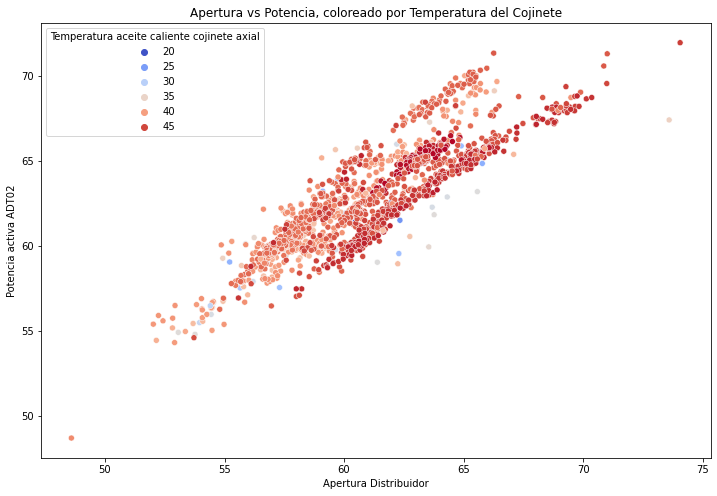

In [139]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='Apertura Distribuidor',
    y='Potencia activa ADT02',
    hue='Temperatura aceite caliente cojinete axial',
    palette='coolwarm'
)
plt.title("Apertura vs Potencia, coloreado por Temperatura del Cojinete")
plt.show()

Al aumentar la apertura del distribuidor (básicamente que ingrese mas agua a la turbina), aumenta la potencia y por consiguiente del temperatura del cojinete. Para un generador con régimen de funcionamiento habitual entre los 60 y 65 MW, la temperatura del cojinetese predomina el rango de los 40 a 45 °C. Para este caso no se observan outliers.

Esto responde a la hippotesis 1 (A mayor apertura del distribuidor, mayor potencia generada y mayor temperatura en los cojinetes).

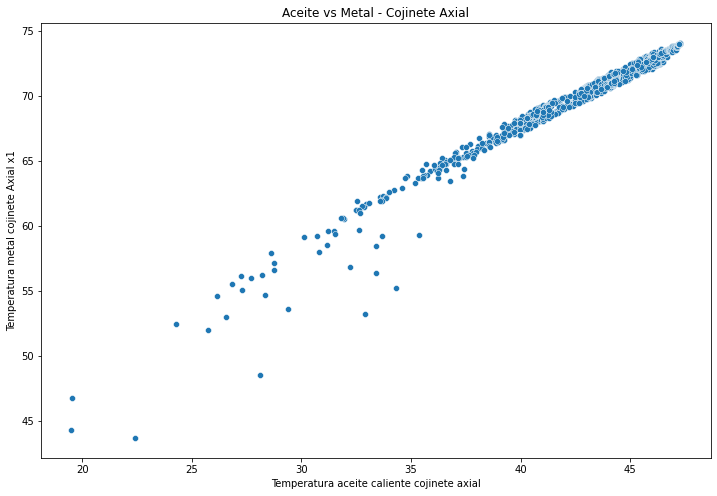

In [140]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Temperatura aceite caliente cojinete axial', y='Temperatura metal cojinete Axial x1')
plt.title('Aceite vs Metal - Cojinete Axial')
plt.show()

#df[['Temperatura aceite caliente cojinete axial', 'Temperatura metal cojinete Axial x1']].corr()

Esto sugiere que ambas variables están altamente correlacionadas, probablemente con un coeficiente de correlación > 0.9. Mas adelante, en la matriz de correlación se podrá este comportamiento
con cada una de las mediciones que se realizan en el metal del cojinete axial desde x1 a x12.

Esta relación puede ser útil para diagnóstico predictivo:
- Si en algún momento el metal sube sin que suba el aceite, podría indicar problemas de lubricación o transferencia de calor defectuosa.

Además, este tipo de gráfico también puede servir como base para construir un modelo de regresión que estime la temperatura del metal en función del aceite.

Nuevamente se confirma la hipótesis 2 (Las temperaturas del metal y del aceite del cojinete axial se comportan de forma sincronizada (alta correlación)).

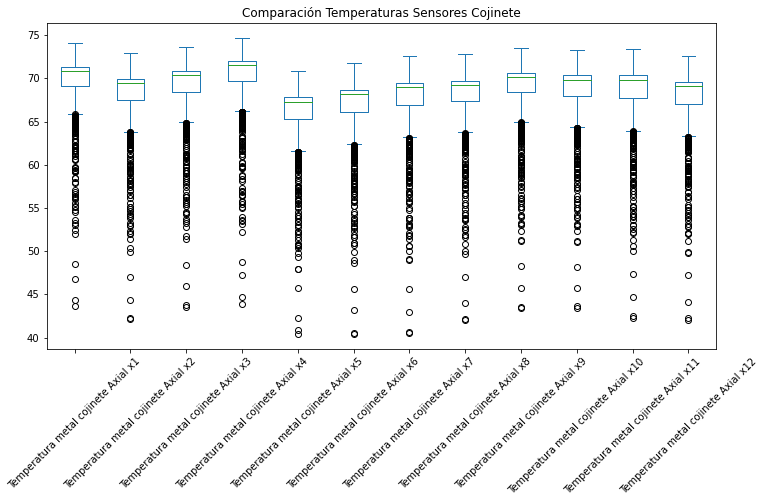

In [113]:
# Si tenés columnas tipo Temperatura x1, x2, ..., x12
cols_temp = [col for col in df.columns if "Temperatura metal cojinete Axial x" in col]
df[cols_temp].plot(kind='box', figsize=(12, 6), title='Comparación Temperaturas Sensores Cojinete')
plt.xticks(rotation=45)
plt.show()

Este gráfico permite visualizar la variabilidad en las mediciones de temperatura del cojinete axial para cada uno de los 12 sensores. Con esta información se puede
profundizar en la calidad de las mediciones y calibración de instrumentos si fuese necesaria.

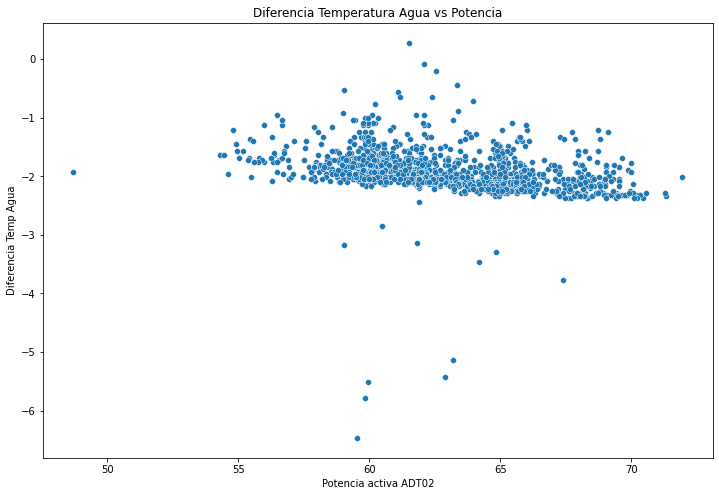

In [141]:
#Sistema de enfriamiento
plt.figure(figsize=(12, 8))
df['Diferencia Temp Agua'] = df['Temperatura entrada agua enfriam. aceite'] - df['Temperatura salida agua  enfriam. aceite']

sns.scatterplot(data=df, x='Potencia activa ADT02', y='Diferencia Temp Agua')
plt.title('Diferencia Temperatura Agua vs Potencia')
plt.show()

Se observa que el sistema térmico mantiene el delta de temperatura constante independientemente de la carga. A primera vista sugiere que el sistema de enfriamiento esta dimensionado correctamente.
Hay varios puntos con diferencias muy negativas (hasta -6 °C) que se apartan fuertemente del grupo. Podrían indicar lecturas anómalas incorrectas.

Se podría pensar que responde satisfactoriamente a la hipótesis 3 (Si el sistema de enfriamiento es eficiente, la diferencia entre la temperatura de entrada y salida del agua debe mantenerse constante.)

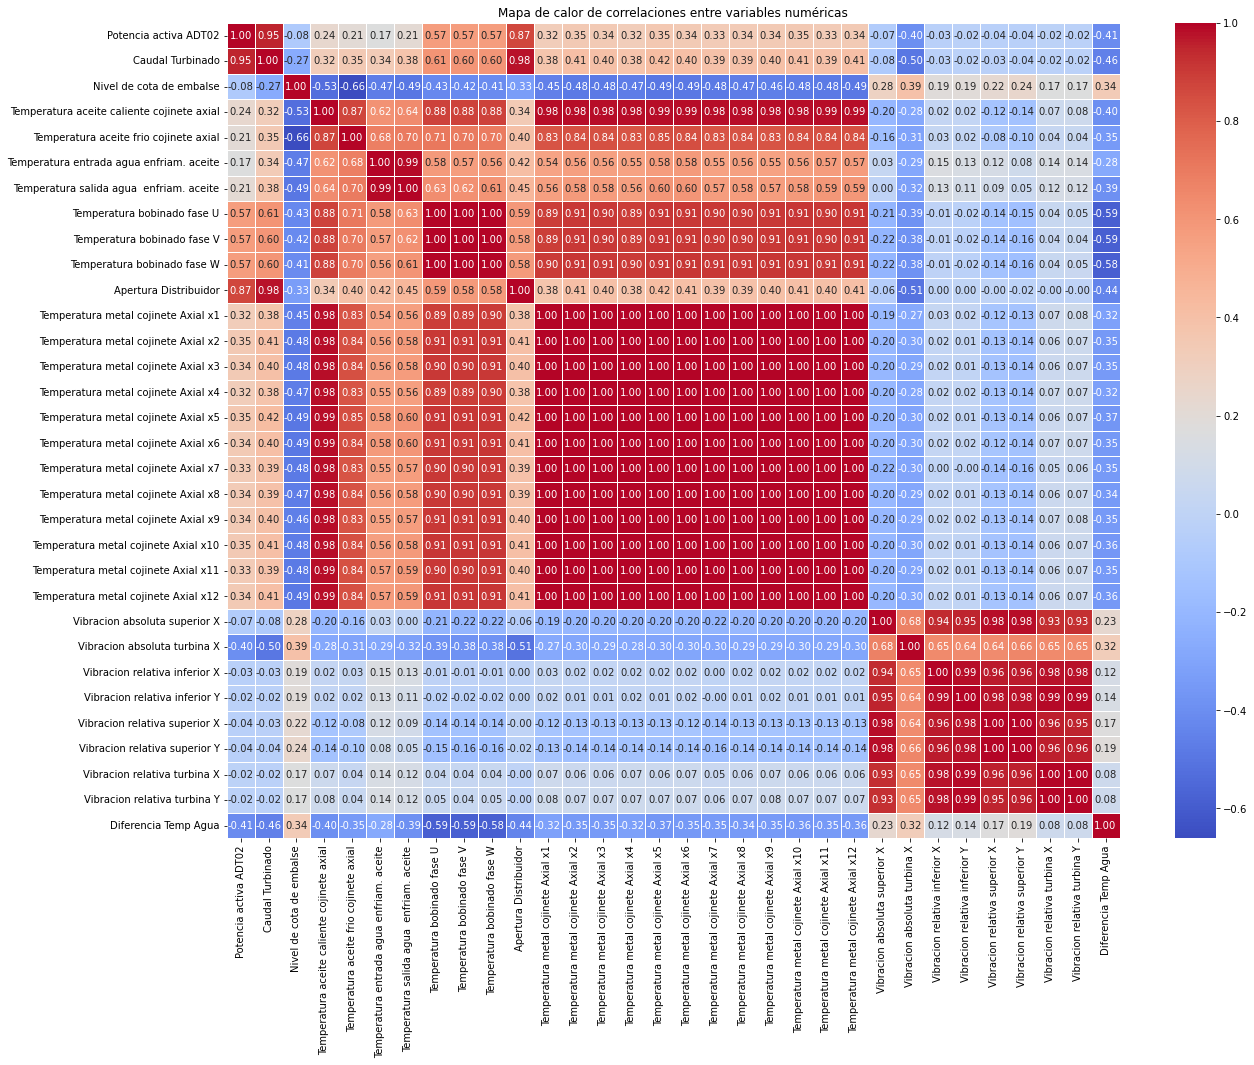

In [121]:
# Seleccionar solo las columnas numéricas para la matriz de correlación
df_numeric = df.select_dtypes(include=['number'])
# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(20, 15))
#sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Mapa de calor de correlaciones entre variables numéricas")
plt.show()

Finalmente se presenta un mapa de calor para presentar el grado correlación que tienen entre sí todas las variables y permiten complementar los comentarios indicados a los gráficos anteriores.